In [1]:
%matplotlib notebook

import psycopg2.extras
import pandas as pd
from apps.backtesting.rebalancing.backtester_portfolio import FixedRatiosPortfolioBacktester
from apps.backtesting.utils import datetime_to_timestamp

import logging, sys
logging.disable(sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

backtester = FixedRatiosPortfolioBacktester(start_time=int(datetime_to_timestamp('2018/10/01 00:00:00 UTC')),
                            end_time=int(datetime_to_timestamp('2018/10/30 00:00:00 UTC')),
                            step_seconds=60*60*24,
                            rebalancing_period_seconds=60*60*24,
                            portions_dict={
                                'BTC': 1.0/3,
                                'DASH': 1.0/3,
                                'NEO': 1.0/3,
                            },
                            start_value_of_portfolio=1,
                            counter_currency='BTC')

df = backtester.value_dataframe

INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 40.54% out of 9.80G


In [2]:
pd.set_option('display.max_columns', 300)
df.tail()

,BTC_amount,BTC_asset,BTC_portion,BTC_timestamp,BTC_unit_price,BTC_unit_price_usdt,BTC_value,BTC_value_usdt,DASH_amount,DASH_asset,DASH_portion,DASH_timestamp,DASH_unit_price,DASH_unit_price_usdt,DASH_value,DASH_value_usdt,NEO_amount,NEO_asset,NEO_portion,NEO_timestamp,NEO_unit_price,NEO_unit_price_usdt,NEO_value,NEO_value_usdt,total_value,total_value_usdt,return_relative_to_past_tick
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
1540512000,0.304682,BTC,0.333333,1540512000,1,6529.52,0.304682,1989.429203,12.712045,DASH,0.333333,1540512000,0.023968,156.516553,0.304682,1989.645528,118.923616,NEO,0.333333,1540512000,0.002562,16.709,0.304682,1987.094704,0.914047,5966.169435,-0.009881
1540598400,0.302506,BTC,0.333333,1540598400,1,6539.90,0.302506,1978.358976,12.605992,DASH,0.333333,1540598400,0.023997,156.928861,0.302506,1978.244024,120.809105,NEO,0.333333,1540598400,0.002504,16.386,0.302506,1979.577989,0.907518,5936.180989,-0.005026
1540684800,0.300209,BTC,0.333333,1540684800,1,6506.85,0.300209,1953.416508,12.672404,DASH,0.333333,1540684800,0.023690,154.147277,0.300209,1953.416508,121.100945,NEO,0.333333,1540684800,0.002479,16.134,0.300209,1953.842644,0.900628,5860.675660,-0.012720
1540771200,0.302939,BTC,0.333333,1540771200,1,6489.93,0.302939,1966.050069,12.546638,DASH,0.333333,1540771200,0.024145,156.682217,0.302939,1965.834983,121.223915,NEO,0.333333,1540771200,0.002499,16.217,0.302939,1965.888225,0.908816,5897.773277,0.006330
1540857600,0.298730,BTC,0.333333,1540857600,1,6344.60,0.298730,1895.320418,12.589754,DASH,0.333333,1540857600,0.023728,150.552974,0.298730,1895.424973,122.530638,NEO,0.333333,1540857600,0.002438,15.465,0.298730,1894.936309,0.896189,5685.681701,-0.035961


<IPython.core.display.Javascript object>


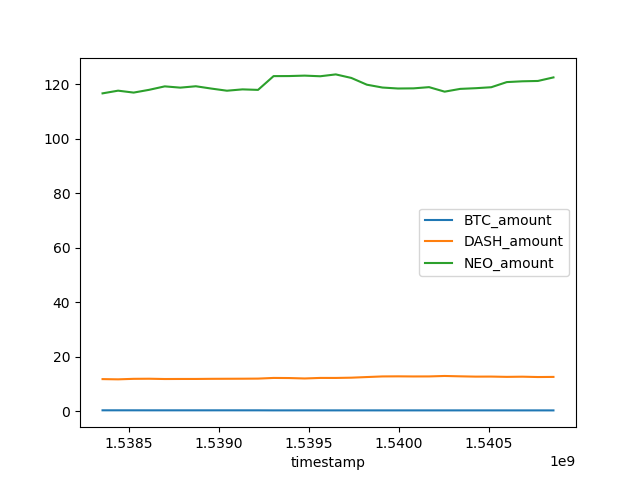

In [3]:
df[[f'{coin}_amount' for coin in backtester.held_assets]].plot()

In [4]:
backtester.get_dataframe_for_asset('BTC')

,amount,asset,portion,unit_price,unit_price_usdt,value,value_usdt
timestamp,,,,,,,
1538352000,0.333333,BTC,0.333333,1,6628.69,0.333333,2209.563333
1538438400,0.332979,BTC,0.333333,1,6607.85,0.332979,2200.272540
1538524800,0.329814,BTC,0.333333,1,6538.43,0.329814,2156.463836
1538611200,0.325967,BTC,0.333333,1,6509.72,0.325967,2121.955908
1538697600,0.325405,BTC,0.333333,1,6593.91,0.325405,2145.692587
1538784000,0.326152,BTC,0.333333,1,6638.96,0.326152,2165.308715
1538870400,0.324681,BTC,0.333333,1,6594.27,0.324681,2141.032771
1538956800,0.325672,BTC,0.333333,1,6615.00,0.325672,2154.318431
1539043200,0.327288,BTC,0.333333,1,6673.00,0.327288,2183.990560


In [5]:
backtester.get_benchmark_trading_dataframe_for_asset('BTC')[['crypto', 'total_value']].join(backtester.get_dataframe_for_asset('BTC'))

,crypto,total_value,amount,asset,portion,unit_price,unit_price_usdt,value,value_usdt
timestamp,,,,,,,,,
1538352000,0.333,0.333000,0.333333,BTC,0.333333,1,6628.69,0.333333,2209.563333
1538438400,0.333,0.333000,0.332979,BTC,0.333333,1,6607.85,0.332979,2200.272540
1538524800,0.333,0.333000,0.329814,BTC,0.333333,1,6538.43,0.329814,2156.463836
1538611200,0.333,0.333000,0.325967,BTC,0.333333,1,6509.72,0.325967,2121.955908
1538697600,0.333,0.333000,0.325405,BTC,0.333333,1,6593.91,0.325405,2145.692587
1538784000,0.333,0.333000,0.326152,BTC,0.333333,1,6638.96,0.326152,2165.308715
1538870400,0.333,0.333000,0.324681,BTC,0.333333,1,6594.27,0.324681,2141.032771
1538956800,0.333,0.333000,0.325672,BTC,0.333333,1,6615.00,0.325672,2154.318431
1539043200,0.333,0.333000,0.327288,BTC,0.333333,1,6673.00,0.327288,2183.990560


In [6]:
pd.set_option('display.max_columns', 300)
backtester.get_benchmark_trading_df_for_all_assets()

,close_price_BTC,signal_BTC,order_BTC,cash_BTC,crypto_BTC,total_value_BTC,order_obj_BTC,signal_obj_BTC,return_from_initial_investment_BTC,return_relative_to_past_tick_BTC,close_price_usdt_BTC,signal_usdt_BTC,order_usdt_BTC,cash_usdt_BTC,crypto_usdt_BTC,total_value_usdt_BTC,order_obj_usdt_BTC,signal_obj_usdt_BTC,return_from_initial_investment_usdt_BTC,return_relative_to_past_tick_usdt_BTC,close_price_DASH,signal_DASH,order_DASH,cash_DASH,crypto_DASH,total_value_DASH,order_obj_DASH,signal_obj_DASH,return_from_initial_investment_DASH,return_relative_to_past_tick_DASH,close_price_usdt_DASH,signal_usdt_DASH,order_usdt_DASH,cash_usdt_DASH,crypto_usdt_DASH,total_value_usdt_DASH,order_obj_usdt_DASH,signal_obj_usdt_DASH,return_from_initial_investment_usdt_DASH,return_relative_to_past_tick_usdt_DASH,close_price_NEO,signal_NEO,order_NEO,cash_NEO,crypto_NEO,total_value_NEO,order_obj_NEO,signal_obj_NEO,return_from_initial_investment_NEO,return_relative_to_past_tick_NEO,close_price_usdt_NEO,signal_usdt_NEO,order_usdt_NEO,cash_usdt_NEO,crypto_usdt_NEO,total_value_usdt_NEO,order_obj_usdt_NEO,signal_obj_usdt_NEO,return_from_initial_investment_usdt_NEO,return_relative_to_past_tick_usdt_NEO,total_value,return_relative_to_past_tick,total_value_usdt
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1538352000,1,,BUY,0.000000,0.333,0.333000,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,6628.69,,BUY,0.000000,0.333,2207.353770,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.028285,,BUY,0.000000,11.773025,0.333000,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,187.492497,,BUY,0.000000,11.773025,2207.353770,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.002857,,BUY,0.000000,116.555828,0.333000,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,18.887,,BUY,0.000000,116.871593,2207.353770,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.999000,NaN,6622.061310
1538438400,1,,,0.000000,0.333,0.333000,None,None,-0.001000,0.000,6607.85,,,0.000000,0.333,2200.414050,None,None,-0.004141,-0.003144,0.028462,,,0.000000,11.773025,0.335084,None,None,0.005251,0.006258,188.072627,,,0.000000,11.773025,2214.183655,None,None,0.002091,0.003094,0.002830,,,0.000000,116.555828,0.329853,None,None,-0.010441,-0.009450,18.713,,,0.000000,116.871593,2187.018113,None,None,-0.010203,-0.009213,0.997937,-0.003087,6601.615818
1538524800,1,,,0.000000,0.333,0.333000,None,None,-0.001000,0.000,6538.43,,,0.000000,0.333,2177.297190,None,None,-0.014603,-0.010506,0.027751,,,0.000000,11.773025,0.326713,None,None,-0.019860,-0.024981,181.447971,,,0.000000,11.773025,2136.191420,None,None,-0.033207,-0.035224,0.002820,,,0.000000,116.555828,0.328687,None,None,-0.013938,-0.003534,18.475,,,0.000000,116.871593,2159.202674,None,None,-0.022792,-0.012718,0.988401,-0.019529,6472.691284
1538611200,1,,,0.000000,0.333,0.333000,None,None,-0.001000,0.000,6509.72,,,0.000000,0.333,2167.736760,None,None,-0.018930,-0.004391,0.027341,,,0.000000,11.773025,0.321886,None,None,-0.034341,-0.014774,177.919097,,,0.000000,11.773025,2094.645898,None,None,-0.052009,-0.019448,0.002763,,,0.000000,116.555828,0.322044,None,None,-0.033869,-0.020213,18.026,,,0.000000,116.871593,2106.727329,None,None,-0.046541,-0.024303,0.976930,-0.016003,6369.109987
1538697600,1,,,0.000000,0.333,0.333000,None,None,-0.001000,0.000,6593.91,,,0.000000,0.333,2195.772030,None,None,-0.006242,0.012933,0.027536,,,0.000000,11.773025,0.324182,None,None,-0.027454,0.007132,181.464718,,,0.000000,11.773025,2136.388587,None,None,-0.033117,0.019928,0.002729,,,0.000000,116.555828,0.318081,None,None,-0.045757,-0.012305,17.980,,,0.000000,116.871593,2101.351235,None,None,-0.048974,-0.002552,0.975263,0.010112,6433.511852
1538784000,1,,,0.000000,0.333,0.333000,None,None,-0.001000,0.000,6638.96,,,0.000000,0.333,2210.773680,None,None,0.000548,0.006832,0.027554,,,0.000000,11.773025,0.324394,None,None,-0.026818,0.000654,183.088064,,,0.000000,11.77

In [7]:
backtester.get_rebalancing_vs_benchmark_dataframe()[['total_value_rebalancing']]

,total_value_rebalancing
timestamp,
2018-10-01,1.000000
2018-10-02,0.998936
2018-10-03,0.989441
2018-10-04,0.977902
2018-10-05,0.976216
2018-10-06,0.978455
2018-10-07,0.974042
2018-10-08,0.977015
2018-10-09,0.981863


<IPython.core.display.Javascript object>


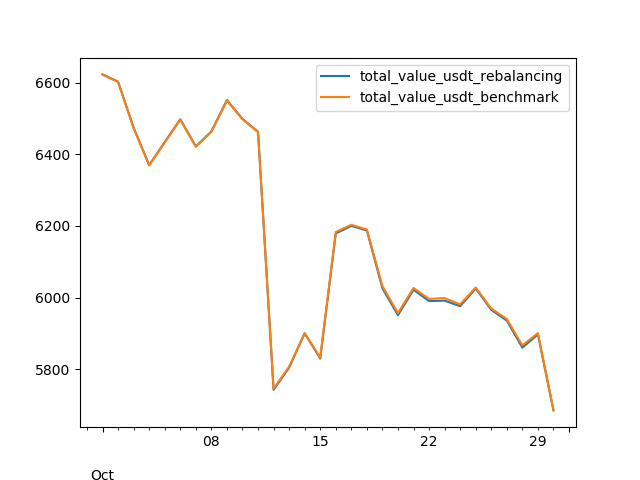

In [8]:
backtester.get_rebalancing_vs_benchmark_dataframe()[['total_value_usdt_rebalancing', 'total_value_usdt_benchmark']].plot()

In [9]:
pd.set_option('display.max_rows', 1000)
backtester.get_rebalancing_vs_benchmark_dataframe()

,BTC_amount,BTC_asset,BTC_portion,BTC_timestamp,BTC_unit_price,BTC_unit_price_usdt,BTC_value,BTC_value_usdt,DASH_amount,DASH_asset,DASH_portion,DASH_timestamp,DASH_unit_price,DASH_unit_price_usdt,DASH_value,DASH_value_usdt,NEO_amount,NEO_asset,NEO_portion,NEO_timestamp,NEO_unit_price,NEO_unit_price_usdt,NEO_value,NEO_value_usdt,total_value_rebalancing,total_value_usdt_rebalancing,return_relative_to_past_tick_rebalancing,close_price_BTC,signal_BTC,order_BTC,cash_BTC,crypto_BTC,total_value_BTC,order_obj_BTC,signal_obj_BTC,return_from_initial_investment_BTC,return_relative_to_past_tick_BTC,close_price_usdt_BTC,signal_usdt_BTC,order_usdt_BTC,cash_usdt_BTC,crypto_usdt_BTC,total_value_usdt_BTC,order_obj_usdt_BTC,signal_obj_usdt_BTC,return_from_initial_investment_usdt_BTC,return_relative_to_past_tick_usdt_BTC,close_price_DASH,signal_DASH,order_DASH,cash_DASH,crypto_DASH,total_value_DASH,order_obj_DASH,signal_obj_DASH,return_from_initial_investment_DASH,return_relative_to_past_tick_DASH,close_price_usdt_DASH,signal_usdt_DASH,order_usdt_DASH,cash_usdt_DASH,crypto_usdt_DASH,total_value_usdt_DASH,order_obj_usdt_DASH,signal_obj_usdt_DASH,return_from_initial_investment_usdt_DASH,return_relative_to_past_tick_usdt_DASH,close_price_NEO,signal_NEO,order_NEO,cash_NEO,crypto_NEO,total_value_NEO,order_obj_NEO,signal_obj_NEO,return_from_initial_investment_NEO,return_relative_to_past_tick_NEO,close_price_usdt_NEO,signal_usdt_NEO,order_usdt_NEO,cash_usdt_NEO,crypto_usdt_NEO,total_value_usdt_NEO,order_obj_usdt_NEO,signal_obj_usdt_NEO,return_from_initial_investment_usdt_NEO,return_relative_to_past_tick_usdt_NEO,total_value_benchmark,return_relative_to_past_tick_benchmark,total_value_usdt_benchmark
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-01,0.333333,BTC,0.333333,1538352000,1,6628.69,0.333333,2209.563333,11.784809,DASH,0.333333,1538352000,0.028285,187.492497,0.333333,2209.563333,116.672500,NEO,0.333333,1538352000,0.002857,18.887,0.333333,2203.593513,1.000000,6622.720180,NaN,1,,BUY,0.000000,0.333,0.333000,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,6628.69,,BUY,0.000000,0.333,2207.353770,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.028285,,BUY,0.000000,11.773025,0.333000,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,187.492497,,BUY,0.000000,11.773025,2207.353770,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.002857,,BUY,0.000000,116.555828,0.333000,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,18.887,,BUY,0.000000,116.871593,2207.353770,2018/10/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.999000,NaN,6622.061310
2018-10-02,0.332979,BTC,0.333333,1538438400,1,6607.85,0.332979,2200.272540,11.699058,DASH,0.333333,1538438400,0.028462,188.072627,0.332979,2200.272540,117.660277,NEO,0.333333,1538438400,0.002830,18.713,0.332979,2201.776768,0.998936,6602.321848,-0.003080,1,,,0.000000,0.333,0.333000,None,None,-0.001000,0.000,6607.85,,,0.000000,0.333,2200.414050,None,None,-0.004141,-0.003144,0.028462,,,0.000000,11.773025,0.335084,None,None,0.005251,0.006258,188.072627,,,0.000000,11.773025,2214.183655,None,None,0.002091,0.003094,0.002830,,,0.000000,116.555828,0.329853,None,None,-0.010441,-0.009450,18.713,,,0.000000,116.871593,2187.018113,None,None,-0.010203,-0.009213,0.997937,-0.003087,6601.615818
2018-10-03,0.329814,BTC,0.333333,1538524800,1,6538.43,0.329814,2156.463836,11.884750,DASH,0.333333,1538524800,0.027751,181.447971,0.329814,2156.463836,116.955215,NEO,0.333333,1538524800,0.002820,18.475,0.329814,2160.747601,0.989441,6473.675273,-0.019485,1,,,0.000000,0.333,0.333000,None,None,-0.001000,0.000,6538.43,,,0.000000,0.333,2177.297190,None,None,-0.014603,-0.010506,0.027751,,,0.000000,11.773025,0.326713,None,None,-0.019860,-0.024981,181.447971,,,0.000000,11.773025,2136.191420,None,None,-0.033207,-0.035224,0.002820,,,0.000000,116.555828,0.328687,None,None,-0.013938,-0.003534,18.475,,,0.000

<IPython.core.display.Javascript object>


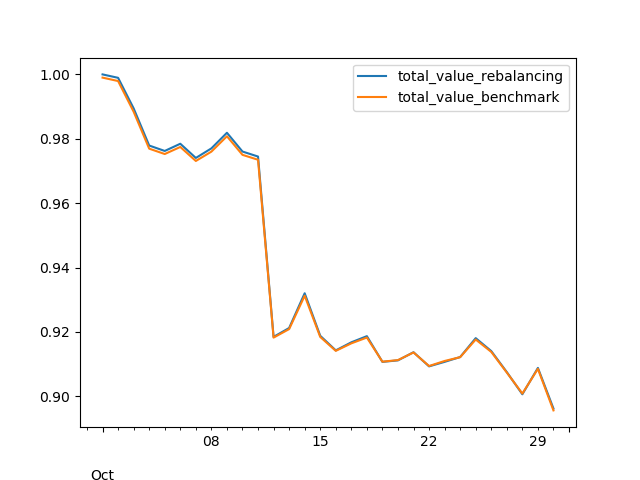

In [10]:
backtester.get_rebalancing_vs_benchmark_dataframe()[['total_value_rebalancing', 'total_value_benchmark']].plot()

Start date,2018-10-01
End date,2018-10-30
Total months,1
,Backtest
Annual return,-72.2%
Cumulative returns,-14.1%
Annual volatility,42.2%
Sharpe ratio,-2.92
Calmar ratio,-5.11
Stability,0.59
Max drawdown,-14.1%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.15,2018-10-01,2018-10-30,NaT,NaN
1,0.00,2018-10-01,2018-10-01,2018-10-01,1
2,0.00,2018-10-01,2018-10-01,2018-10-01,1
3,0.00,2018-10-01,2018-10-01,2018-10-01,1
4,0.00,2018-10-01,2018-10-01,2018-10-01,1


<IPython.core.display.Javascript object>


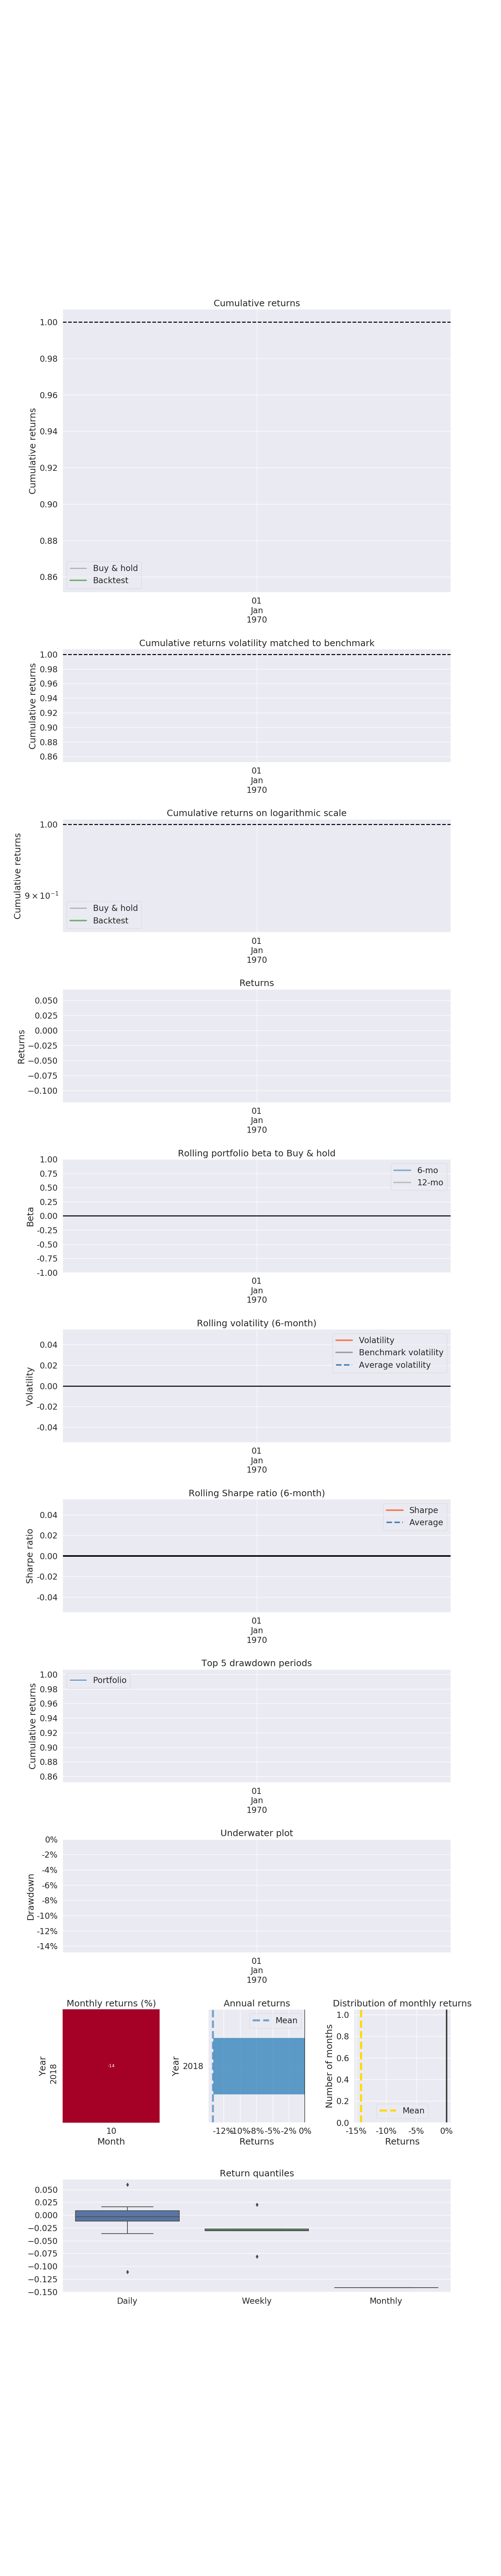

<IPython.core.display.Javascript object>


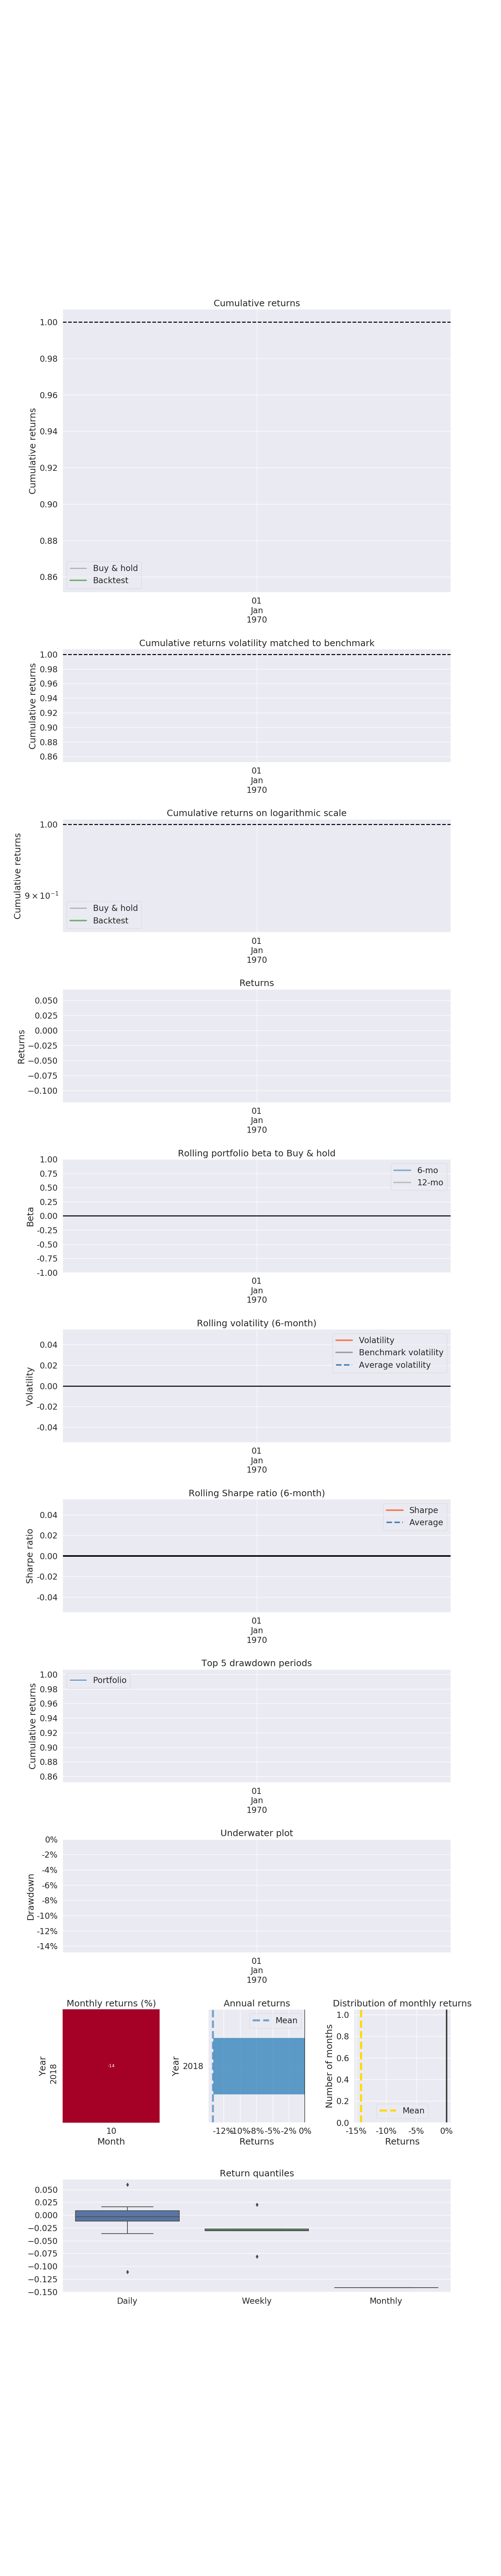

In [11]:
backtester.draw_returns_tear_sheet()